# 01_eda

#Imports

In [1]:
!source venv/bin/activate

# this is for our data manipulations
import pandas as pd
import numpy as np

# this is for our visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

zsh:source:1: no such file or directory: venv/bin/activate


###Charge dataset
So here, we can fastly find our $n$,$m$ values  
>$n$=columns, $m$=rows  

In [2]:
# import the dataset
#path ==> 'data/'

path = '../data/'
df = pd.read_csv(path+'insurance.csv')
n_rows, n_cols = df.shape

print(f"Dataset columns : {n_cols}\nDataset rows : {n_rows}")
print("")

# looking into top rows and columns
df.head()

Dataset columns : 7
Dataset rows : 1338



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


>$n$=7, $m$=1338  

With $m$, our number of training examples, and $n$ our number of independant variables  

Here :  
>the features $x$ are : ***age, sex, bmi, children, smoker, region***  
>the target variable $y$ is : ***charges***  

That means we need to fit multiple linear regression  
In this project, we will use teta $(\theta)$ as a vector of $w,b$ (weight/bias)
>
>$$
>\theta = w,b
>$$
To compute the medical cost for an ***i*** person :
>$$
>h_\theta(x_i)
>$$  
So the hypothesis function for our dataset :  
>$$
>h_\theta(x_i) = \theta_0 + \theta_1 \cdot \text{age} + \theta_2 \cdot \text{sex} + \theta_3 \cdot \text{bmi} + \theta_4 \cdot \text{children} + \theta_5 \cdot \text{smoker} + \theta_6 \cdot \text{region}
>$$

So,  
If $i = 1$,  
$$
h_\theta(x_1) = \theta_0 + \theta_1 \cdot 19 + \theta_2 \cdot \text{female} + \theta_3 \cdot 27.900 + \theta_4 \cdot 1 + \theta_5 \cdot \text{yes} + \theta_6 \cdot \text{southwest}
$$
$$
y1 = 168884.92400
$$


Because we have : 
<p style="text-align:center;">
  <img src="../images/01_x1.png">
</p>  

$\theta_0$ = constant (bias/intercept), in french : biais/ordonnée à l'origine  
In fact, it's when all features = 0  
$\theta_1$ = coefficient of the 1st feature  
$\theta_2$ = coefficient of the 2nd feature  
...


It's determining the ***height*** of a feature $x$ on the ***model prediction***.  
Keep in mind that the best value of $\theta$ is the one who minimize the most the errors between predictions & true values.  
/!\ Index start from 0, so the first element $i$=1 is index 0.  

So our goal now will be to find best value of $\theta$

Before that, let's check if our dataset is clean

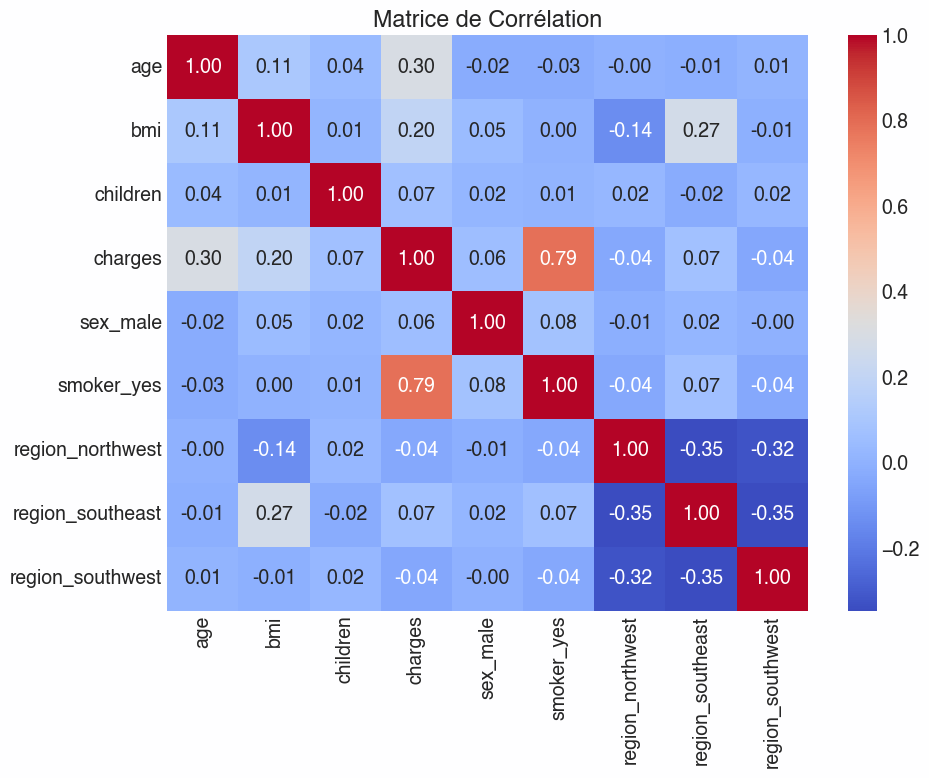

In [3]:
# copy of df to avoid modifying the original one
df_encoded = df.copy()

# conversion of categorical features into numerical ones
df_encoded = pd.get_dummies(df_encoded, columns=['sex', 'smoker', 'region'], drop_first=True)

# matrix of correlation computed between features
matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.tight_layout()
plt.show()

Why **sex_female** is missing ?  

When we have categorical variables (like **sex** here),  
we do what is called **one-hot-enconding**  
It's the fact to transform  **alphanumerical** values into **numerical** values. 

But these 2 columns are redundant,  
because if $male=1$, we automaticly know that it's not $female=0$.

**sex_male** & **sex_female** are perfectly negatively correlated $(-1)$

**pd.get_dummies()** : sélectionner les valeurs catégoriques

**drop_first=True** : binary encodage -> avoid multicolinearity  
best method here for efficiency because we have only 2 values



If we use both variables in LM, we will have some problems, because variables are not independants  
It's called : **dummy variable trap**

<p style="text-align:center;">
  <img src="../images/02_oneHotEncoding.png">
</p>  

<p style="text-align:center;">
  <img src="../images/03_oneHotEncodingDataset.png">
</p>

Now, let's analyse the bests correlations we have.

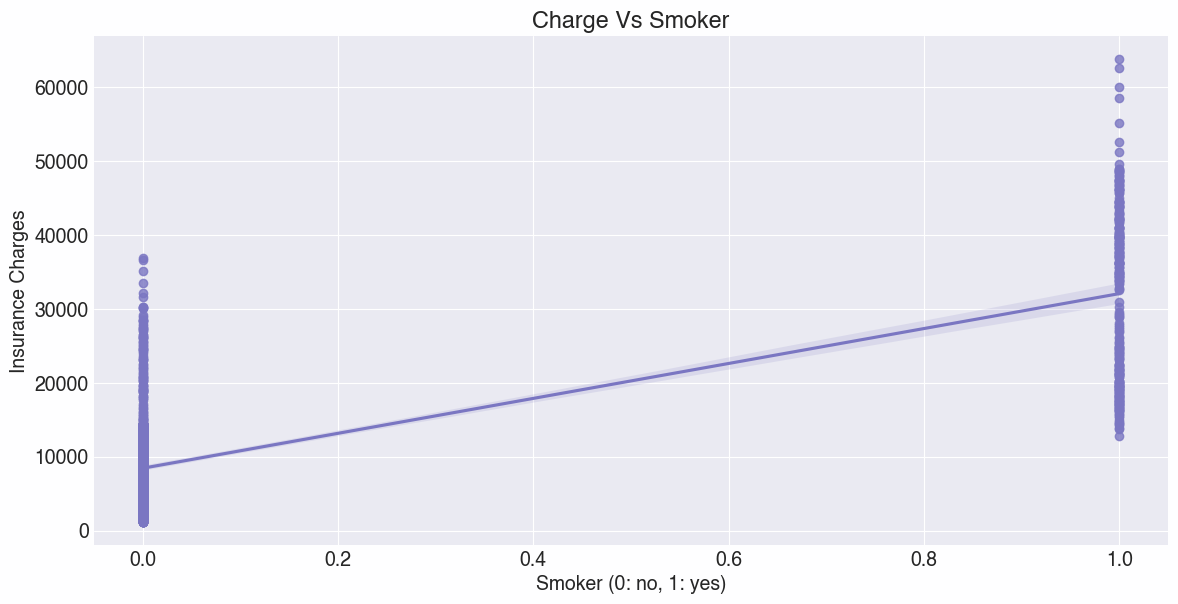

In [4]:
df_encoded = df.copy()
df_encoded['smoker_numeric'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})

sns.lmplot(x='smoker_numeric', y='charges', data=df_encoded, aspect=2, height=6)
plt.xlabel('Smoker (0: no, 1: yes)')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs Smoker');
plt.show()


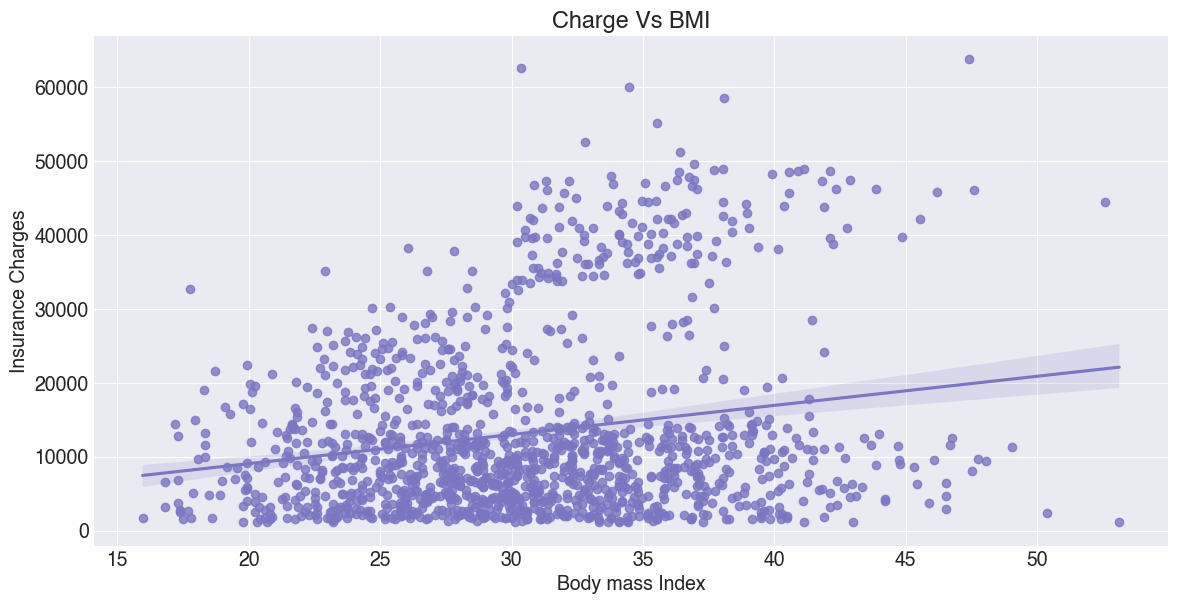

In [5]:
sns.lmplot(x='bmi', y='charges', data=df_encoded, aspect=2, height=6)
plt.xlabel('Body mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI');
plt.show()

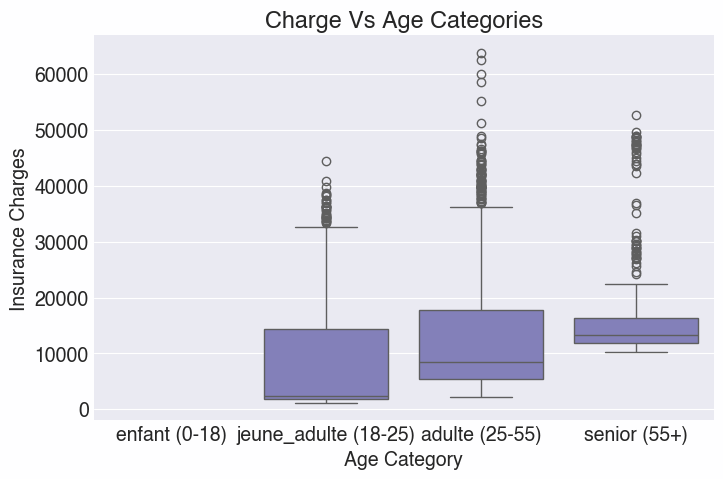

In [6]:
# age categories
bins = [0, 18, 25, 55, 100]
labels = ['enfant (0-18)', 'jeune_adulte (18-25)', 'adulte (25-55)', 'senior (55+)']
df_encoded['age_category'] = pd.cut(df_encoded['age'], bins=bins, labels=labels, right=False)

sns.boxplot(x='age_category', y='charges', data=df_encoded)
plt.xlabel('Age Category')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs Age Categories');
plt.show()

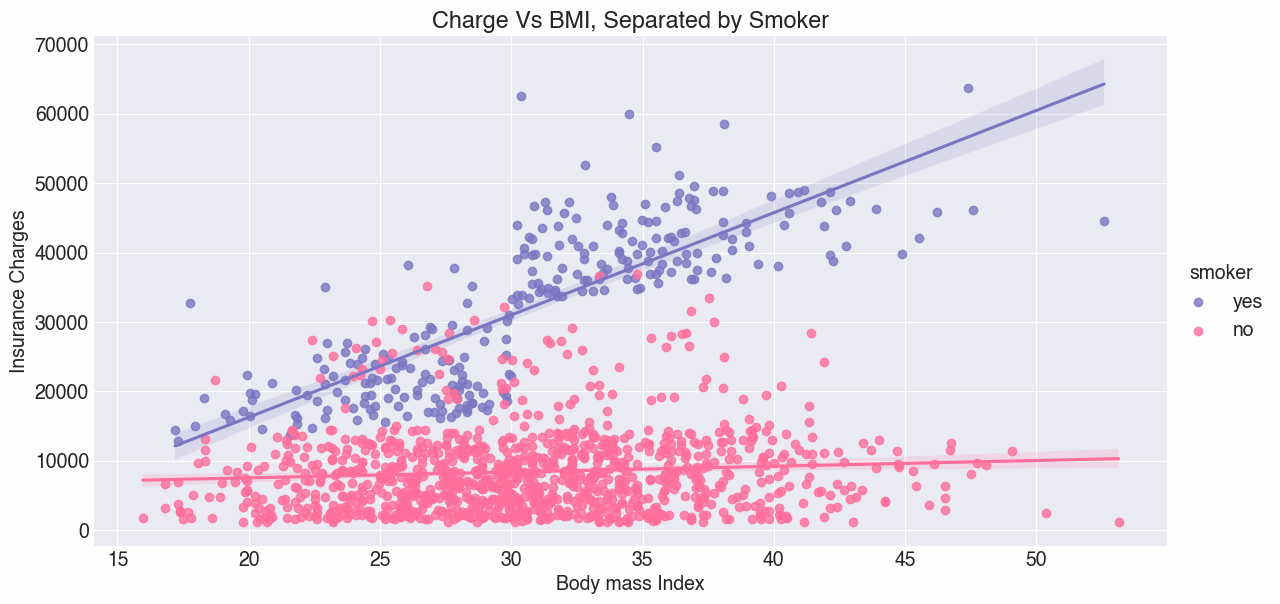

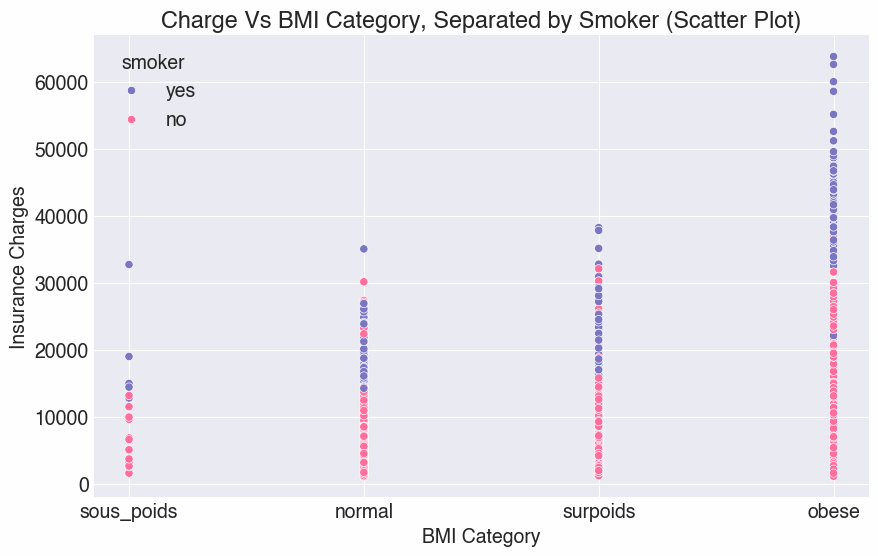

In [7]:


# BMI categories
bins_bmi = [0, 18.5, 25, 30, 100]
labels_bmi = ['sous_poids', 'normal', 'surpoids', 'obese']
df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

# feature engineering : interaction between bmi & smoker
df_encoded['bmi_smoker_interaction'] = df_encoded['bmi'] * df_encoded['smoker_numeric']

sns.lmplot(x='bmi', y='charges', data=df_encoded, hue='smoker', aspect=2, height=6)
plt.xlabel('Body mass Index')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI, Separated by Smoker');
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi_category', y='charges', hue='smoker', data=df_encoded)
plt.xlabel('BMI Category')
plt.ylabel('Insurance Charges')
plt.title('Charge Vs BMI Category, Separated by Smoker (Scatter Plot)');
plt.show()

In [8]:
df.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


#Cost function

The cost function measure the errors between predicted and real values in our model.  
There is the cost function called Mean Squared Error (MSE) for a dataset with $m$ training examples.
>$$
>J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
>$$
It's represent the mean of the squared errors.

To implement the linear regression, take training example add an extra column that is  $X_{0}$ feature  
>[\
$X$ = 
\begin{pmatrix}
x_{10} & x_{11} & x_{12} & \dots & x_{1n} \\
x_{20} & x_{21} & x_{22} & \dots & x_{2n} \\
x_{m0} & x_{m1} & x_{m2} & \dots & x_{mn}
\end{pmatrix}_{(m,n+1)}
\]

Now, we rewrite the least square cost function in matrix form :

>$$
J(\theta) = \frac{1}{2m} \left( X\theta - y \right)^T \left( X\theta - y \right)
$$



#J derivative

To minimize our cost function and also obtain optimal values for >$\theta$, we need to compute the derivative of $J(\theta)$ ***(matrix form)***
>$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$
This function is called **GRADIENT**  
**Gradient** : derivative of a vectorial function (several parameters)  

We can see here that we have $0,79 (>0,7)$ between feature $x$ **'smoker_yes'** & target $y$ **'charges'**.  
>That means if a person is a smoker, it will have a big height into the amount of medical charges.

#Gradient descent

Now that we have our cost function, we can compute the gradient descent to find the best value of $\theta$  
The gradient descent is an algorithm that will find the best value of $\theta$ by minimizing the cost function  
It's an iterative algorithm that will update the value of $\theta$ until it converges to the best value  

The update rule is :  
>$$
\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla_\theta J(\theta^{(i)})
$$

$\theta^{(i+1)} =$ updated value of the parameters vector $\theta$  
$\theta^{(i)} =$ the current value of the parameter vector $\theta$ at the current iteration $i$  
$\alpha =$ learning rate, hyperparameter that determines the step size taken during each iteration  
$\nabla_\theta J(\theta^{(i)}) =$ gradient of the cost function J evaluated at the current parameter vector $\theta^{(i)}$



Now we have our formula, we can implement it in code to train our linear regression model.

---

# 02_dataPreprocessing

#Data preprocessing

In [9]:
!source venv/bin/activate

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler # scale the datas
from sklearn.model_selection import train_test_split # split the datas

import pickle # store the datas

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

zsh:source:1: no such file or directory: venv/bin/activate


In [10]:
path = '../data/'
df = pd.read_csv(path+'insurance.csv')
df_encoded = df.copy()
df_encoded.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Feature engineering

Now that we have some infos about our datas, we can make feature engineering.  
It’s the possible way to create new features from previous features (bases on intuition) to train the model much more.  
We compute $x1*x2$ to find $x3$


Here, some feature interest us :  
- smoker(yes) : strongest correlation : $0.79$
- age : 2nd correlation : $0.30$
- bmi : 3rd correlation : $0.29$

So, from these features, we can do some engineering.  
Our model will be smarter because he could catch non-linear relations.

In [11]:
# one-hot-encoding smokers
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
# one-hot-encoding sex
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
# for 'region' which has multiple categories, use one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


We splitted regions into 3 columns with name of regions (one-hot-encoding) with True/False

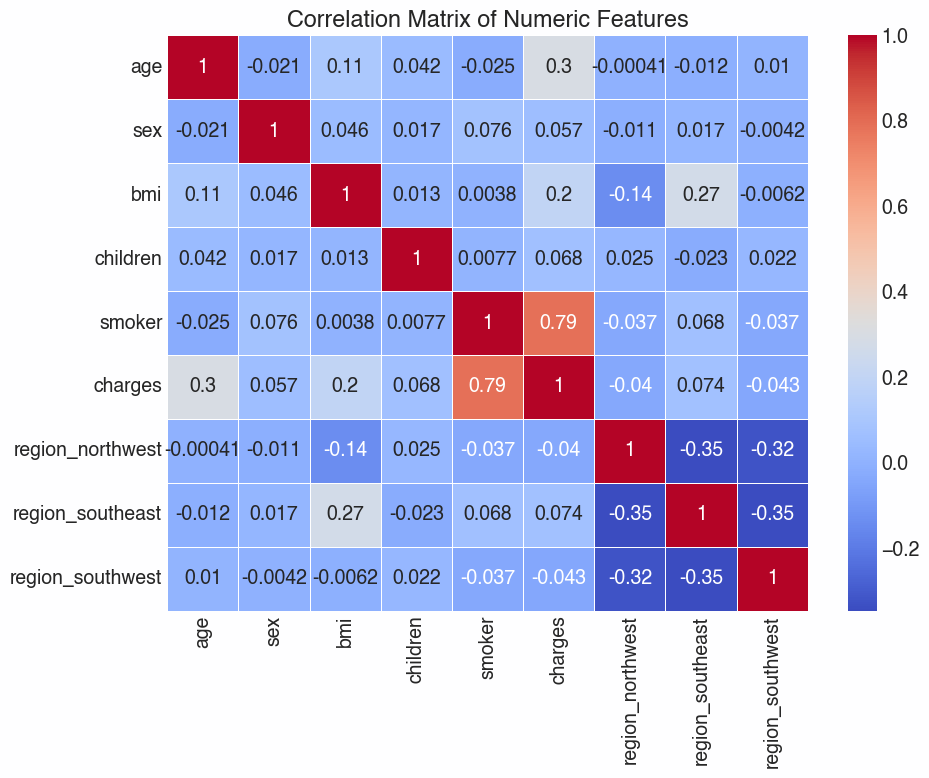

In [12]:
# correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Correlation matrix shows us :
- a strong correlation between smoker & charges ($>0.7$)
- a moderate correlation between age & bmi 
- a little correlation between region_southeast & bmi 
- a little correlation between age & charges

So, we have to take the strongest corr feature with target and create engineered features with other features from it.  
We can also squared moderate corr features (with target)

Log the target is also a good practice when the distribution is right-skewed with many moderate values and fewer extreme high values.  
The logarithmic make distribution more normal : improving model performance (by creating more linear relationship)

In [13]:
# interaction features based on correlation insights
df_encoded['age_bmi'] = df_encoded['age'] * df_encoded['bmi']  # Interaction between age and BMI
df_encoded['smoker_age'] = df_encoded['smoker'] * df_encoded['age']  # Interaction between smoking and age
df_encoded['smoker_bmi'] = df_encoded['smoker'] * df_encoded['bmi']  # Interaction between smoking and BMI

# polynomial features for important variables
df_encoded['bmi_squared'] = df_encoded['bmi'] ** 2  # Quadratic term for BMI
df_encoded['age_squared'] = df_encoded['age'] ** 2  # Quadratic term for age

# log transform for skewed variables (like charges)
df_encoded['log_charges'] = np.log1p(df_encoded['charges'])  # log1p to handle zeros

df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_bmi,smoker_age,smoker_bmi,bmi_squared,age_squared,log_charges
0,19,0,27.900,0,1,16884.92400,False,False,True,530.100,19,27.9,778.410000,361,9.734236
1,18,1,33.770,1,0,1725.55230,False,True,False,607.860,0,0.0,1140.412900,324,7.453882
2,28,1,33.000,3,0,4449.46200,False,True,False,924.000,0,0.0,1089.000000,784,8.400763
3,33,1,22.705,0,0,21984.47061,True,False,False,749.265,0,0.0,515.517025,1089,9.998137
4,32,1,28.880,0,0,3866.85520,True,False,False,924.160,0,0.0,834.054400,1024,8.260455


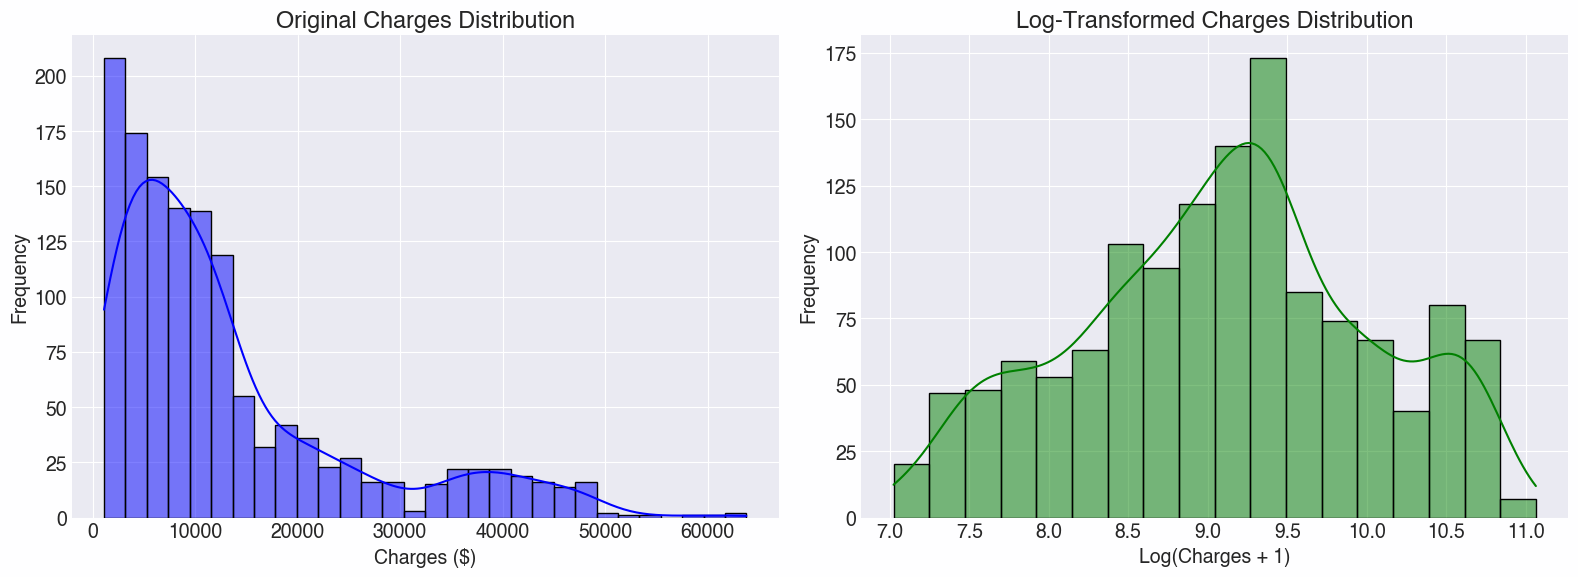


Skewness - Original Charges: 1.5158796580240388
Skewness - Log Charges: -0.08981728740026824


In [14]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original charges distribution
sns.histplot(df_encoded['charges'], kde=True, ax=ax1, color='blue')
ax1.set_title('Original Charges Distribution')
ax1.set_xlabel('Charges ($)')
ax1.set_ylabel('Frequency')

# Plot 2: Log-transformed charges distribution
sns.histplot(df_encoded['log_charges'], kde=True, ax=ax2, color='green')
ax2.set_title('Log-Transformed Charges Distribution')
ax2.set_xlabel('Log(Charges + 1)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate and print skewness
print("\nSkewness - Original Charges:", df_encoded['charges'].skew())
print("Skewness - Log Charges:", df_encoded['log_charges'].skew())

##Scaling

In [15]:
# select features except the target variable
features = df_encoded.drop(['charges', 'log_charges'], axis=1)
target = df_encoded['charges']
log_target = df_encoded['log_charges']

# apply scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


Verify if values are in a small range (normalized)

Means of scaled features:
age                -1.805565e-16
sex                -1.234687e-16
bmi                -2.124194e-16
children           -5.576008e-17
smoker              1.062097e-17
region_northwest    1.062097e-16
region_southeast   -1.062097e-17
region_southwest    1.035544e-16
age_bmi            -1.062097e-17
smoker_age         -4.646673e-17
smoker_bmi          2.788004e-17
bmi_squared         1.035544e-16
age_squared        -9.293347e-17
dtype: float64

Standard deviations of scaled features:
age                 1.000374
sex                 1.000374
bmi                 1.000374
children            1.000374
smoker              1.000374
region_northwest    1.000374
region_southeast    1.000374
region_southwest    1.000374
age_bmi             1.000374
smoker_age          1.000374
smoker_bmi          1.000374
bmi_squared         1.000374
age_squared         1.000374
dtype: float64

Minimum values:
age                -1.509965
sex                -1.010519
bmi                -2.

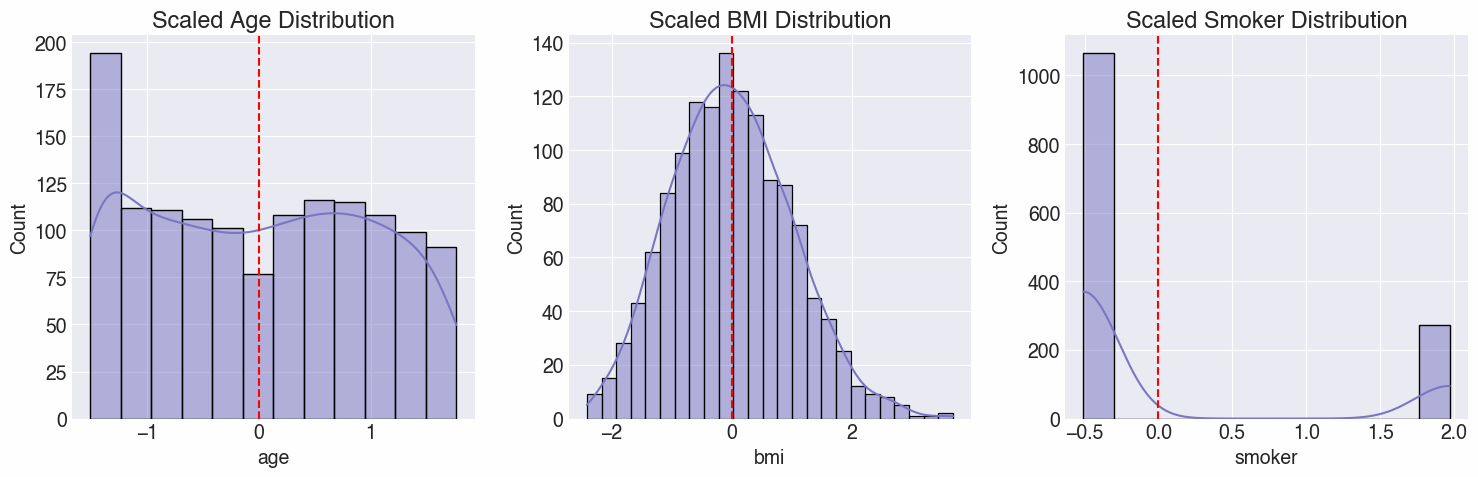

In [16]:
# check if scaling worked properly - should be close to mean=0, std=1 for each column
print("Means of scaled features:")
print(scaled_df.mean())
print("\nStandard deviations of scaled features:")
print(scaled_df.std())

# check the range of values (should generally be within ±3 for most data points)
print("\nMinimum values:")
print(scaled_df.min())
print("\nMaximum values:")
print(scaled_df.max())

# visualize the distribution of a few key scaled features
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(scaled_df['age'], kde=True)
plt.title('Scaled Age Distribution')
plt.axvline(x=0, color='r', linestyle='--')

plt.subplot(132)
sns.histplot(scaled_df['bmi'], kde=True)
plt.title('Scaled BMI Distribution')
plt.axvline(x=0, color='r', linestyle='--')

plt.subplot(133)
sns.histplot(scaled_df['smoker'], kde=True)
plt.title('Scaled Smoker Distribution')
plt.axvline(x=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

- centered distributions (means $≈ 0$)
- similar spreads for all features (standard deviations $≈ 1$)
- no extreme values that would suggest scaling errors $(-2.41 > 0 > 4.76)$

##Training

Now that we have our engineered features, we can train our dataset.  
We have to separate it into 2 version  
- one with original target
- one with log target

In [17]:
# create two versions
X = scaled_df
y = target # one with original target 
y_log = log_target # one with log-transformed target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.15, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1137, 13)
Testing set shape: (201, 13)


`test_size = 0.15` </pre> : means,
- 15% of our dataset will be use for test 
- 85% of our dataset will be use for training 

##Saving data

Our datas are ready for modeling.  
Now we have to save them to use it later for the training.

In [18]:
preprocessing_data = {
    'X_train': X_train,
    'X_test': X_test, 
    'y_train': y_train,
    'y_test': y_test,
    'X_train_log': X_train_log,
    'X_test_log': X_test_log,
    'y_train_log': y_train_log,
    'y_test_log': y_test_log,
    'scaler': scaler,
    'feature_names': X.columns.tolist()
}

with open('../data/preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessing_data, f)

print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


---

# 03_training

#Training

Let's train our model to fit the best as possible our datas.

In [19]:
import os

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt  
import seaborn as sns 

# model serialization
import pickle  # for saving and loading Python objects (models, scalers, etc.)

# linear models
from sklearn.linear_model import LinearRegression  # for basic linear regression models
from sklearn.linear_model import Ridge, Lasso  # ror regularized regression (reduces overfitting)

# ensemble models
from sklearn.ensemble import RandomForestRegressor  # tree-based ensemble using bagging
from sklearn.ensemble import GradientBoostingRegressor  # tree-based ensemble using boosting

# model evaluation
from sklearn.metrics import mean_squared_error  # measures prediction error (MSE)
from sklearn.metrics import r2_score  # measures explained variance (0-1)
from sklearn.metrics import mean_absolute_error  # measures prediction error (absolute)

# model selection and validation
from sklearn.model_selection import cross_val_score  # for k-fold cross-validation
from sklearn.model_selection import GridSearchCV  # for hyperparameter tuning

# feature engineering
from sklearn.preprocessing import PolynomialFeatures  # creates polynomial and interaction features

# suppress warning messages
import warnings  # provides warnings about potential issues
warnings.filterwarnings('ignore')  # prevents display of warning messages

In [20]:
# set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)

##Load datas

In [21]:
with open('../data/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
y_train_log = data['y_train_log']
y_test_log = data['y_test_log']

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Feature names: {X_train.columns.tolist()}")

Training data shape: (1137, 13)
Testing data shape: (201, 13)
Feature names: ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'age_bmi', 'smoker_age', 'smoker_bmi', 'bmi_squared', 'age_squared']


Definition of evaluation function (linear regression)

Train RMSE: $4807.36
Test RMSE: $4556.20
R² Score: 0.8637


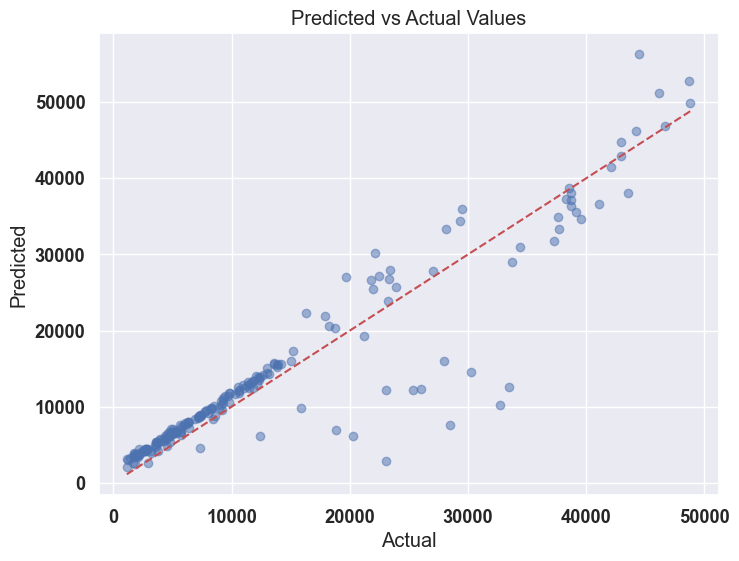

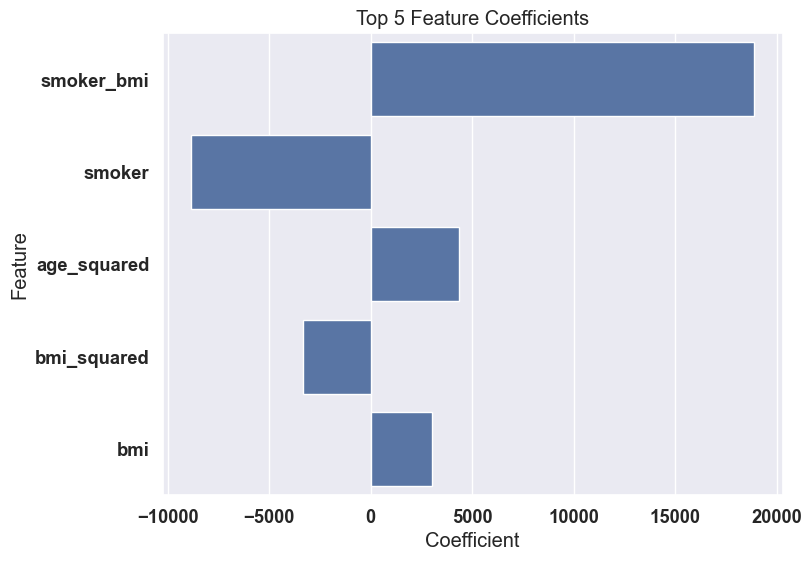

In [22]:
# simple evaluation function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """Simple function to evaluate model performance"""
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Train RMSE: ${train_rmse:.2f}")
    print(f"Test RMSE: ${test_rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')
    plt.show()
    
    return model

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
lr = evaluate_model(lr, X_train, X_test, y_train, y_test)

# Show feature importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.head(5))
plt.title('Top 5 Feature Coefficients')
plt.show()

Polynomial Regression (degree=2):
Train RMSE: $4572.14
Test RMSE: $5101.33
R² Score: 0.8291


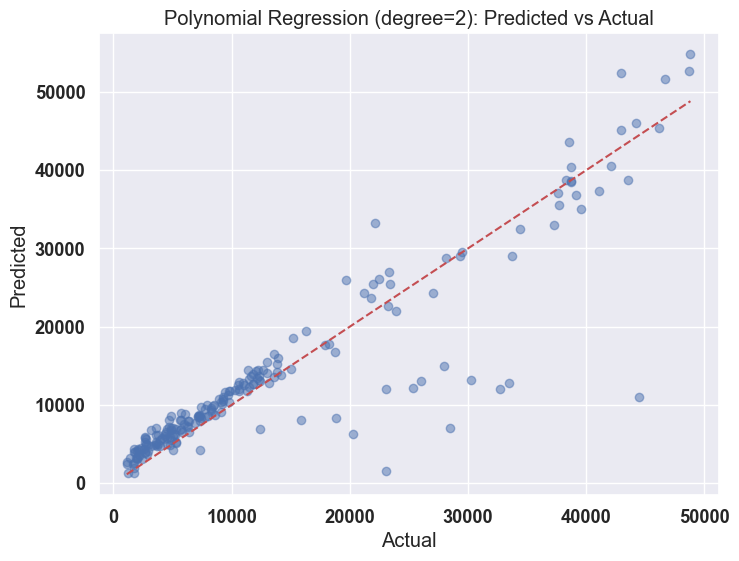

Polynomial Regression (degree=3):
Train RMSE: $4088.70
Test RMSE: $12161.97
R² Score: 0.0286


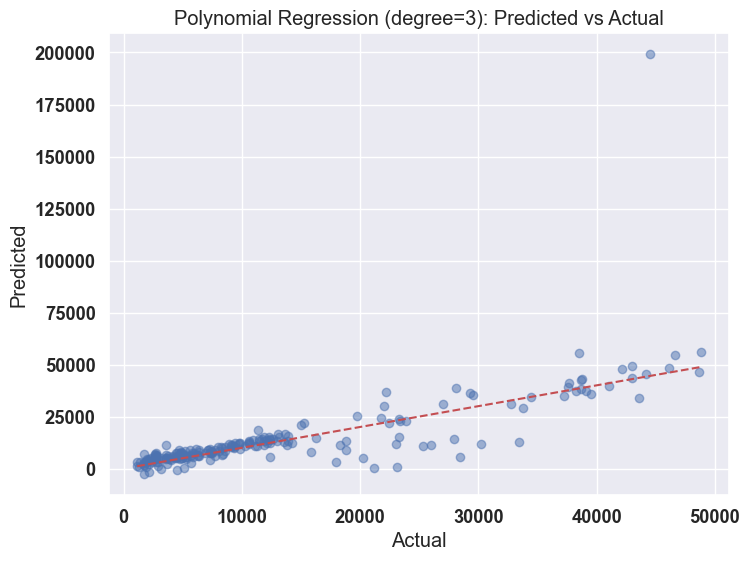

In [23]:
# Function to create and evaluate polynomial regression model
def polynomial_regression(X_train, X_test, y_train, y_test, degree=2):
    """Train and evaluate a polynomial regression model"""
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train linear regression on polynomial features
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    # Make predictions
    y_train_pred = poly_reg.predict(X_train_poly)
    y_test_pred = poly_reg.predict(X_test_poly)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    
    # Print results
    print(f"Polynomial Regression (degree={degree}):")
    print(f"Train RMSE: ${train_rmse:.2f}")
    print(f"Test RMSE: ${test_rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    
    # Plot predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Polynomial Regression (degree={degree}): Predicted vs Actual')
    plt.show()
    
    return poly_reg, poly

# Try different polynomial degrees
for degree in [2, 3]:
    model, poly_transformer = polynomial_regression(X_train, X_test, y_train, y_test, degree)

Model Comparison:
                   Model  Training RMSE    Test RMSE   Test R²
0      Linear Regression    4807.361191  4556.203962  0.863668
1  Polynomial Regression    4572.138085  5101.334306  0.829093


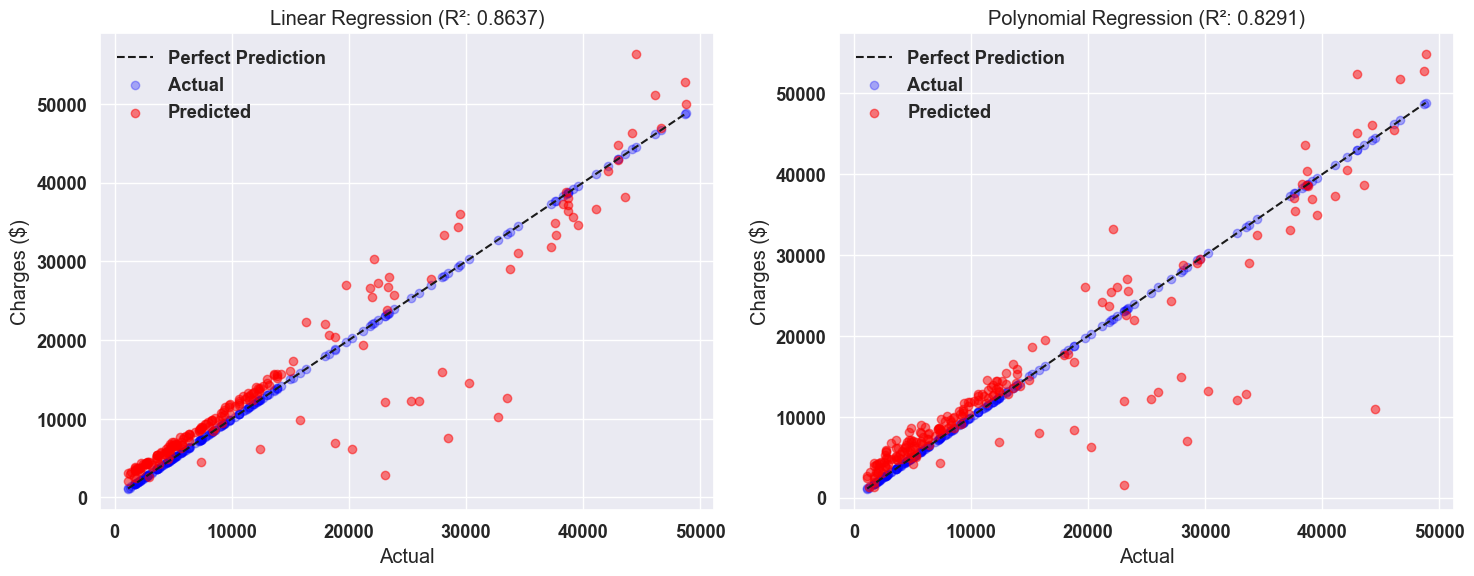

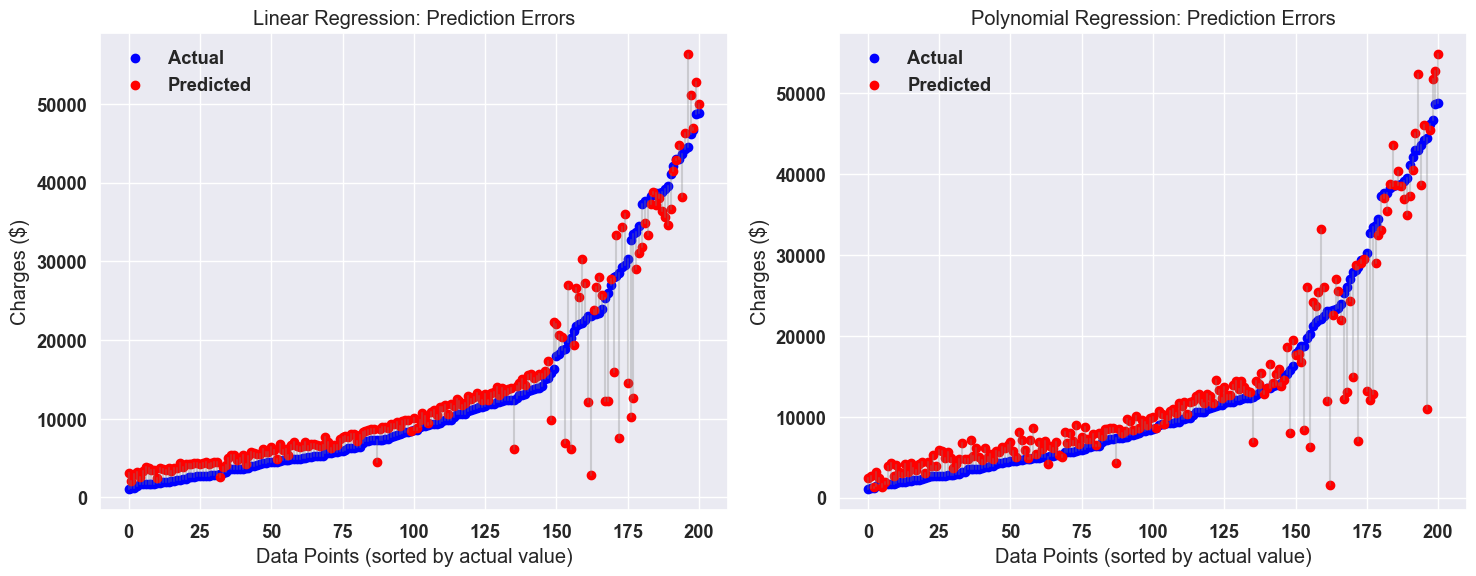

The better model is: Linear Regression
Performance improvement: 4.17%


In [24]:
# Linear vs Polynomial Regression

# 1. train both models
# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# polynomial regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_train_pred = poly_reg.predict(X_train_poly)
poly_test_pred = poly_reg.predict(X_test_poly)

# 2. calculate metrics for both models
# linear regression metrics
lr_train_rmse = np.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_r2 = r2_score(y_test, lr_test_pred)

# polynomial regression metrics
poly_train_rmse = np.sqrt(mean_squared_error(y_train, poly_train_pred))
poly_test_rmse = np.sqrt(mean_squared_error(y_test, poly_test_pred))
poly_r2 = r2_score(y_test, poly_test_pred)

# 3. create comparison table
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Training RMSE': [lr_train_rmse, poly_train_rmse],
    'Test RMSE': [lr_test_rmse, poly_test_rmse],
    'Test R²': [lr_r2, poly_r2]
})

print("Model Comparison:")
print(comparison)

# 4. Visualize predictions with color differentiation
plt.figure(figsize=(15, 6))

# Linear Regression with color differentiation
plt.subplot(1, 2, 1)
# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
# Plot actual points
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Actual')
# Plot predicted points
plt.scatter(y_test, lr_test_pred, color='red', alpha=0.5, label='Predicted')
plt.title(f'Linear Regression (R²: {lr_r2:.4f})')
plt.xlabel('Actual')
plt.ylabel('Charges ($)')
plt.legend()

# Polynomial Regression with color differentiation
plt.subplot(1, 2, 2)
# Plot perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
# Plot actual points
plt.scatter(y_test, y_test, color='blue', alpha=0.3, label='Actual')
# Plot predicted points
plt.scatter(y_test, poly_test_pred, color='red', alpha=0.5, label='Predicted')
plt.title(f'Polynomial Regression (R²: {poly_r2:.4f})')
plt.xlabel('Actual')
plt.ylabel('Charges ($)')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Alternative visualization: Show prediction errors with lines
plt.figure(figsize=(15, 6))

# Linear Regression with error lines
plt.subplot(1, 2, 1)
# Sort data for clearer visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices].reset_index(drop=True)
lr_pred_sorted = lr_test_pred[sorted_indices]

# Plot actual and predicted
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual')
plt.scatter(range(len(y_test_sorted)), lr_pred_sorted, color='red', label='Predicted')

# Connect with lines to show errors
for i in range(len(y_test_sorted)):
    plt.plot([i, i], [y_test_sorted[i], lr_pred_sorted[i]], 'gray', alpha=0.3)

plt.title('Linear Regression: Prediction Errors')
plt.xlabel('Data Points (sorted by actual value)')
plt.ylabel('Charges ($)')
plt.legend()

# Polynomial Regression with error lines
plt.subplot(1, 2, 2)
poly_pred_sorted = poly_test_pred[sorted_indices]

# Plot actual and predicted
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color='blue', label='Actual')
plt.scatter(range(len(y_test_sorted)), poly_pred_sorted, color='red', label='Predicted')

# Connect with lines to show errors
for i in range(len(y_test_sorted)):
    plt.plot([i, i], [y_test_sorted[i], poly_pred_sorted[i]], 'gray', alpha=0.3)

plt.title('Polynomial Regression: Prediction Errors')
plt.xlabel('Data Points (sorted by actual value)')
plt.ylabel('Charges ($)')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Identify which model is better
better_model = "Polynomial Regression" if poly_r2 > lr_r2 else "Linear Regression"
improvement = ((poly_r2 - lr_r2) / lr_r2 * 100) if poly_r2 > lr_r2 else ((lr_r2 - poly_r2) / poly_r2 * 100)

print(f"The better model is: {better_model}")
print(f"Performance improvement: {improvement:.2f}%")

Our model have a pretty good fitting !  
Function follow the logic of datas with a little underestimating tendancy but it's totally ok.   

Also we can see linear regression model is better because :  
$R^2 : 0 < 0.8291 < 0.8637 < 1$


We can now verify the heights of features in prediction :

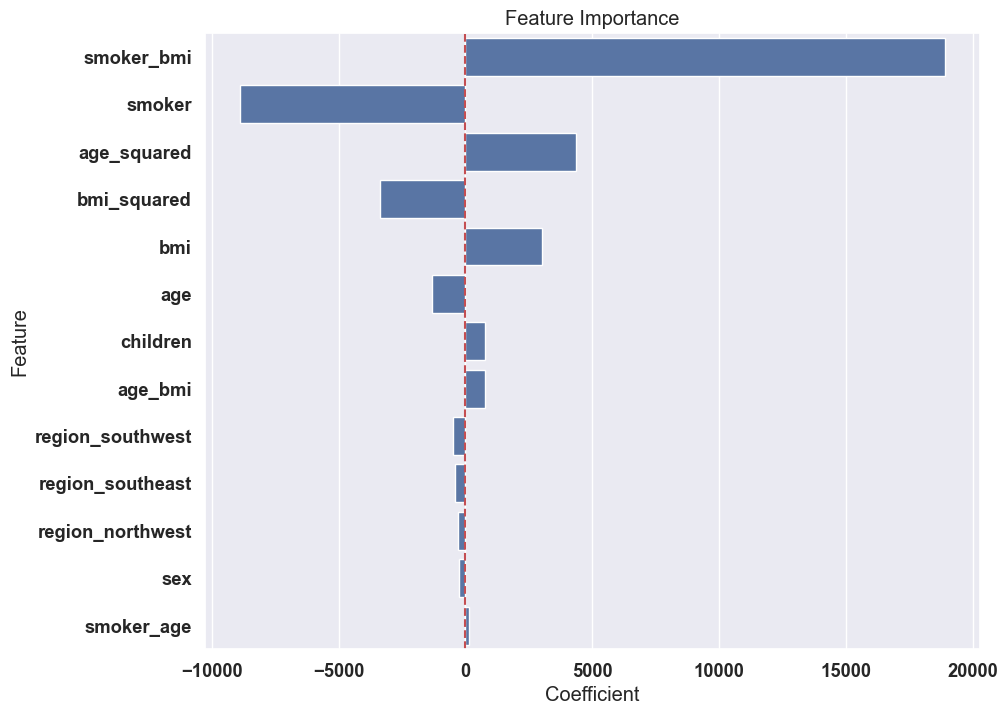

In [25]:
   # display coefficient values to understand feature importance
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
   
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()

**smoker_bmi** seems to be the most important feature in prediction. (non-linear)  
Smoking alone (with a good bmi) doesn't necessarly increase costs 

age & bmi seems to be acceleratif effects on charges  
(cost increase as you get older)

###Saving model

Now that our model is good, we can save it to *models/* with ***.pkl*** extension.

In [26]:
# saving linear regression model
os.makedirs('../models', exist_ok=True)

with open('../models/insurance_model.pkl', 'wb') as f:
    pickle.dump({
        'model': lr,
        'features': X_train.columns.tolist()
    }, f)

print("Model saved successfully!")

Model saved successfully!


In [27]:
# Update your prediction function to properly handle scaling
def predict_insurance_charge(age, sex, bmi, children, smoker, region):
    """Function to predict insurance charges with proper scaling"""
    # Create a DataFrame with input data
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [1 if sex == 'male' else 0],
        'bmi': [bmi],
        'children': [children],
        'smoker': [1 if smoker == 'yes' else 0],
        'region_northwest': [1 if region == 'northwest' else 0],
        'region_southeast': [1 if region == 'southeast' else 0],
        'region_southwest': [1 if region == 'southwest' else 0]
    })
    
    # Create derived features
    input_data['age_bmi'] = input_data['age'] * input_data['bmi']
    input_data['smoker_age'] = input_data['smoker'] * input_data['age']
    input_data['smoker_bmi'] = input_data['smoker'] * input_data['bmi']
    input_data['bmi_squared'] = input_data['bmi'] ** 2
    input_data['age_squared'] = input_data['age'] ** 2
    
    # Check if we need to apply scaling
    if 'scaler' in data:  # Assuming 'data' contains your preprocessing objects
        input_data_scaled = data['scaler'].transform(input_data)
        input_data = pd.DataFrame(input_data_scaled, columns=input_data.columns)
    
    # Make prediction
    prediction = lr.predict(input_data)[0]
    
    return prediction

# Let's test if the model itself is working correctly by using the test set
sample_index = 0  # Take the first sample from the test set
sample_x = X_test.iloc[sample_index:sample_index+1]
actual_y = y_test.iloc[sample_index]
predicted_y = lr.predict(sample_x)[0]

print(f"Sample from test set:")
print(f"Actual charge: ${actual_y:.2f}")
print(f"Predicted charge: ${predicted_y:.2f}")

Sample from test set:
Actual charge: $9095.07
Predicted charge: $10699.14


In [28]:
# test prediction for a single person
my_age = 35  
my_sex = "male" 
my_bmi = 27.5  
my_children = 2 
my_smoker = "no" 
my_region = "southeast"

# make prediction
predicted_cost = predict_insurance_charge(
    age=my_age,
    sex=my_sex,
    bmi=my_bmi,
    children=my_children,
    smoker=my_smoker,
    region=my_region
)

predicted_cost_monthly = predicted_cost / 12

# display the result
print(f"\nPredicted Insurance Cost for Your Input:")
print(f"Age: {my_age}, Sex: {my_sex}, BMI: {my_bmi}")
print(f"Children: {my_children}, Smoker: {my_smoker}, Region: {my_region}")
print(f"Estimated Monthly Insurance Cost: ${predicted_cost_monthly:.2f}")

# calculate monthly cost
# monthly_cost = predicted_cost / 12
# print(f"Estimated Monthly Insurance Cost: ${monthly_cost:.2f}")


Predicted Insurance Cost for Your Input:
Age: 35, Sex: male, BMI: 27.5
Children: 2, Smoker: no, Region: southeast
Estimated Monthly Insurance Cost: $576.30


In [29]:
# 1. Check if y_train was transformed (log or scaling)
print("Target variable statistics:")
print(f"Min: ${y_train.min():.2f}")
print(f"Max: ${y_train.max():.2f}")
print(f"Mean: ${y_train.mean():.2f}")

# 2. Test prediction with realistic values for a non-smoker
test_non_smoker = predict_insurance_charge(
    age=30, sex="male", bmi=25, children=0, smoker="no", region="southeast"
)
print(f"\nPredicted cost for non-smoker: ${test_non_smoker:.2f}")

# 3. Test with same person as smoker
test_smoker = predict_insurance_charge(
    age=30, sex="male", bmi=25, children=0, smoker="yes", region="southeast"
)
print(f"Predicted cost for smoker: ${test_smoker:.2f}")
print(f"Difference: ${test_smoker - test_non_smoker:.2f}")

# 4. Check a few actual values to compare
print("\nSample of actual charges from dataset:")
sample_df = pd.DataFrame({
    'age': X_test['age'].head(3),
    'bmi': X_test['bmi'].head(3),
    'smoker': X_test['smoker'].head(3),
    'actual_charges': y_test.head(3)
})
print(sample_df)

# 5. If the model is indeed predicting unrealistically high values, 
# you may need to review your feature engineering

Target variable statistics:
Min: $1121.87
Max: $63770.43
Mean: $13285.25

Predicted cost for non-smoker: $4411.01
Predicted cost for smoker: $19833.12
Difference: $15422.11

Sample of actual charges from dataset:
          age       bmi    smoker  actual_charges
764  0.412467 -0.900341 -0.507463      9095.06825
887 -0.228344 -0.105546 -0.507463      5272.17580
890  1.765289 -0.619825  1.970587     29330.98315


---

# 04_predictions

In [30]:
!source venv/bin/activate

import pandas as pd
import pickle
import sys
sys.path.append('../')  # Add parent directory to path
from src.predict import predict_insurance_charge

zsh:source:1: no such file or directory: venv/bin/activate


In [31]:
# Load model and data
with open('../models/insurance_model.pkl', 'rb') as f:
    model_data = pickle.load(f)

model = model_data['model']

# Try to load scaler if available
try:
    with open('../data/preprocessed_data.pkl', 'rb') as f:
        data = pickle.load(f)
    scaler = data.get('scaler', None)
except:
    scaler = None

# Make prediction
predicted_cost = predict_insurance_charge(
    model=model,
    age=57,
    sex="male",
    bmi=19,
    children=0,
    smoker="yes",
    region="southeast",
    scaler=scaler
)

# Display results
print(f"Predicted cost: ${predicted_cost:.2f}")
print(f"Monthly cost: ${predicted_cost/12:.2f}")

Predicted cost: $17527.20
Monthly cost: $1460.60


---